In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import csv

In [87]:
dataset = pd.read_csv("nisantasiedu_ins.csv")

In [88]:
dataset

,Content,Comments,Number of Comments
0,Nörobilim ve Tıp Kongresi! 🧠 Bu yıl dördüncüsü...,I wanted to enroll in your university is the D...,1
1,a little silence! #exammoods,شكرا لان سويتو اونلاين 🔥🔥 حرفع معدلي بسبب ال g...,5
2,The final exam week has started 🏁 We wish you ...,"👏👏👏, 25 dakika süre veriyorlar 25 dakika fazla...",3
3,Güz dönemi yatay geçiş başvuruları başladı! 🚨 ...,Son tarih ne zaman,1
4,Every moment is full of moments we love ❤️ bec...,anlam vermeye calisiyorum sadece yok sebepten ...,20
...,...,...,...
145,İstanbul Nişantaşı Üniversitesi Tercih ve Tanı...,NaN,0
146,İstanbul Nişantaşı Üniversitesi Tercih ve Tanı...,NaN,0
147,İstanbul Nişantaşı Üniversitesi Tercih ve Tanı...,NaN,0
148,Heyecanın dorukta olduğu oyun turnuvasının kal...,"👏, 😮, 🔥🔥🔥, 🔥👏🔥👏",4


In [113]:
import pandas as pd

dataset = pd.read_csv("nisantasiedu_ins.csv")

dataset["Number of Comments"] = dataset["Number of Comments"].astype(int)

en_cok_yorum_alan_icerikler = dataset.nlargest(5, "Number of Comments")

print("EN YÜKSEK YORUM SAYISINA SAHİP OLAN İÇERİKLER")

for index, row in en_cok_yorum_alan_icerikler.iterrows():
    print(f"Content: {row['Content']}")
    print(f"Yorum Sayısı: {row['Number of Comments']}")
    print()

EN YÜKSEK YORUM SAYISINA SAHİP OLAN İÇERİKLER
Content: Reminder 🛎️ Midterm results have been announced! Which is your mode 👉Licence and associate degree #whichmod #nisantasiuniversity 
Yorum Sayısı: 801

Content: Aramıza hoş geldin Nişantaşılı! 💙 Sen hangi bölümü tercih ederek hayallerine bir adım daha yaklaştın? Kayıt işlemelerin için seni üniversitene, NeoTech Campus’e bekliyoruz. #İstanbulNişantaşıÜniversitesi
Yorum Sayısı: 238

Content: Sevgili öğrenciler, 2022-2023 Güz Dönemi Hazırlık Sınıfı ders programı yayımlandı. Güncellenen ders programlarına hikayedeki linkten ulaşabilirsiniz. Dear students, 2022-2023 Fall Semester Preparation School course schedule has been announced. You can reach updated course schedules through the link in stories.
Yorum Sayısı: 216

Content: Tekrar bir arada olduğumuz için çok mutluyuz! İyi ki geldiniz, #hoşgeldiniz 🧡 #neotechcampussizinlegüzel
Yorum Sayısı: 118

Content: We look forward to seeing you on April 3 with new memories! ✨ Who is already excit

In [114]:
toplam_icerik_sayisi = len(dataset)
toplam_yorum_sayisi = dataset['Number of Comments'].sum()

print("Toplam İçerik Sayısı:", toplam_icerik_sayisi)
print("Toplam Yorum Sayısı:", toplam_yorum_sayisi)

Toplam İçerik Sayısı: 150
Toplam Yorum Sayısı: 3229


In [115]:
import plotly.graph_objects as go

toplam_icerik_sayisi = len(dataset)
toplam_yorum_sayisi = dataset['Number of Comments'].sum()

labels = ['Toplam İçerik Sayısı', 'Toplam Yorum Sayısı']
values = [toplam_icerik_sayisi, toplam_yorum_sayisi]

fig = go.Figure(data=[go.Bar(x=labels, y=values)])

fig.update_traces(texttemplate='%{y} adet', textposition='inside')

fig.update_layout(
    yaxis_title='Sayı',
    title='Toplam İçerik ve Yorum Sayısı')
fig.show()


In [111]:
icerik_yorum_sayisi = dataset['Number of Comments'].value_counts()

icerik_yorum_df = pd.DataFrame({'Yorum Sayısı': icerik_yorum_sayisi.index, 'icerik Sayısı': icerik_yorum_sayisi.values})

icerik_yorum_df = icerik_yorum_df.sort_values(by='Yorum Sayısı', ascending=False)

icerik_yorum_df.index = range(1, len(icerik_yorum_df) + 1)

print(icerik_yorum_df)

    Yorum Sayısı  icerik Sayısı
1            801              1
2            238              1
3            216              1
4            118              1
5            105              1
6            102              2
7             77              1
8             66              1
9             65              1
10            59              1
11            57              1
12            51              1
13            49              1
14            46              1
15            42              1
16            39              1
17            33              2
18            31              1
19            27              1
20            25              1
21            23              2
22            22              1
23            20              3
24            19              1
25            18              3
26            17              4
27            16              1
28            15              3
29            14              2
30            13              2
31      

In [112]:
import plotly.graph_objects as go

yorum_sayisi = [803, 239, 217, 163, 125, 107, 102, 77, 67, 65, 59, 57, 51, 49, 46, 42, 39, 33, 31, 29, 27, 23, 22, 21, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
icerik_sayisi = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 6, 5, 1, 2, 2, 1, 3, 3, 4, 8, 6, 5, 7, 8, 11, 14, 13, 9, 13]

x = list(range(len(yorum_sayisi)))

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=yorum_sayisi))

fig.update_layout(
    xaxis_title='İçerik Sayısı',
    yaxis_title='Yorum Sayısı',
    title='İçeriklere Göre Yorum Sayıları'
)

fig.update_layout(xaxis_tickangle=0, xaxis_tickmode='array', xaxis_tickvals=x, xaxis_ticktext=icerik_sayisi)

fig.show()

In [94]:
import pandas as pd
import plotly.graph_objects as go

dataset = pd.read_csv('nisantasiedu_ins.csv')

dataset['Yorum Oranı'] = (dataset['Number of Comments'] / dataset['Number of Comments'].sum()) * 100

en_cok_yorum_alan_icerikler = dataset.nlargest(10, 'Number of Comments')

veriler = en_cok_yorum_alan_icerikler['Number of Comments']
etiketler = en_cok_yorum_alan_icerikler['Content'].str.split().str[:4].str.join(' ') + '...'

fig = go.Figure(data=[go.Pie(labels=etiketler, values=veriler, textinfo='value')])

fig.update_layout(title='En Çok Yorum Alan İçerikler ve Yorum Sayısı')

fig.show()

In [120]:
from collections import Counter
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(50)

print("YORUMLARDA EN ÇOK TEKRAR EDEN 50 KELİME")

for kelime, sayi in en_cok_gecenler:
    print(f"{kelime}: {sayi} defa")


YORUMLARDA EN ÇOK TEKRAR EDEN 50 KELİME
the: 1976 defa
nişantaşı: 1098 defa
we: 1052 defa
not: 869 defa
pay: 867 defa
do: 865 defa
accept: 861 defa
year: 854 defa
nişantaşiüniversite: 838 defa
nişantaşıüniversitesi: 764 defa
in: 621 defa
increase: 620 defa
and: 475 defa
to: 469 defa
i: 463 defa
university: 459 defa
for: 459 defa
a: 453 defa
price: 450 defa
of: 449 defa
nisantasi: 448 defa
at: 434 defa
dollars: 432 defa
student: 431 defa
before: 427 defa
new: 425 defa
end: 425 defa
being: 423 defa
forced: 423 defa
because: 422 defa
as: 370 defa
rica: 362 defa
ediyoruz: 355 defa
olarak: 343 defa
fiyat: 320 defa
bize: 289 defa
öğrencileri: 283 defa
halde: 282 defa
artışı: 278 defa
uygun: 278 defa
artmadığı: 278 defa
fiyatlar: 278 defa
talebimizi: 278 defa
duymanızı: 278 defa
fiyatı: 273 defa
artıyorbizim: 273 defa
değil: 267 defa
dolar: 238 defa
ve: 235 defa
bir: 214 defa


In [126]:
kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Pie(labels=kelimeler_liste, values=sayilar_liste, textinfo='value')])

fig.update_layout(
    title='Yorumlarda En Çok Tekrar Eden 50 Kelime',
    showlegend=True,
    width=1000,
    height=800
)

fig.show()

In [97]:
import pandas as pd
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(50)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Bar(x=kelimeler_liste, y=sayilar_liste)])

fig.update_layout(
    xaxis_title='Kelimeler',
    yaxis_title='Tekrar Sayısı',
    title='Yorumlarda En Çok Tekrar Eden 50 Kelime',
    xaxis_tickangle=-90  # X eksenindeki etiketleri döndürme
)

fig.show()

In [98]:
from collections import Counter
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

print("YORUMLARDA EN ÇOK TEKRAR EDEN 10 KELİME")

for kelime, sayi in en_cok_gecenler:
    print(f"{kelime}: {sayi} defa")

YORUMLARDA EN ÇOK TEKRAR EDEN 10 KELİME
the: 1976 defa
nişantaşı: 1098 defa
we: 1052 defa
not: 869 defa
pay: 867 defa
do: 865 defa
accept: 861 defa
year: 854 defa
nişantaşiüniversite: 838 defa
nişantaşıüniversitesi: 764 defa


In [99]:
import re
from collections import Counter
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Pie(labels=kelimeler_liste, values=sayilar_liste, textinfo='value')])

fig.update_layout(
    title='Yorumlarda En Çok Tekrar Eden 10 Kelime ve Tekrar Sayıları',
    showlegend=True,
    width=800,
    height=600
)

fig.show()

In [100]:
import pandas as pd
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Bar(x=kelimeler_liste, y=sayilar_liste)])

fig.update_layout(
    xaxis_title='Kelimeler',
    yaxis_title='Tekrar Sayısı',
    title='Yorumlarda En Çok Tekrar Eden 10 Kelime',
    xaxis_tickangle=-45  # X eksenindeki etiketleri döndürme
)

fig.show()

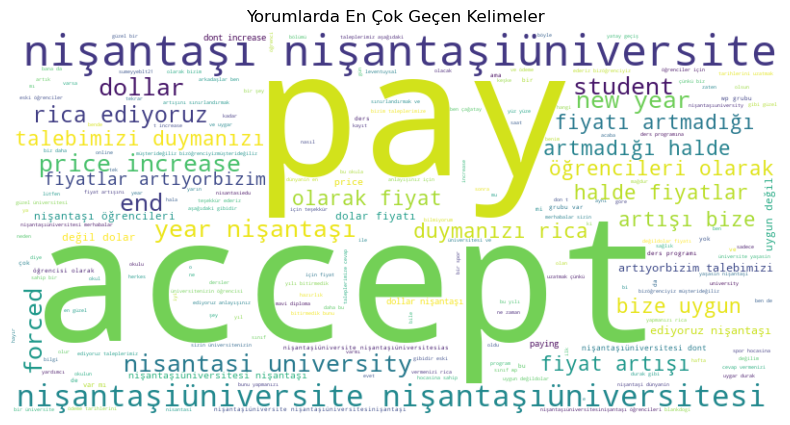

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelime_bulutu = WordCloud(width=800, height=400, background_color='white').generate(tum_yorumlar)

plt.figure(figsize=(10, 5))
plt.imshow(kelime_bulutu, interpolation='bilinear')
plt.axis('off')
plt.title('Yorumlarda En Çok Geçen Kelimeler')
plt.show()

In [102]:
import pandas as pd

dataset = pd.read_csv("nisantasiedu_ins.csv")

dataset = dataset.dropna(subset=["Comments"])

instagram_yorumlar_veriSeti = pd.DataFrame(columns=["Yorum"])

for _, row in dataset.iterrows():
    yorumlar = row["Comments"].split(",")
    for yorum in yorumlar:
        instagram_yorumlar_veriSeti = pd.concat([instagram_yorumlar_veriSeti, pd.DataFrame({"Yorum": [yorum.strip()]})], ignore_index=True)

instagram_yorumlar_veriSeti.to_csv("nisantasiedu_ins_yorumlar.csv", index=False)
print("Yeni Veri Seti kaydedildi: nisantasiedu_ins_yorumlar.csv")

Yeni Veri Seti kaydedildi: nisantasiedu_ins_yorumlar.csv


In [103]:
import pandas as pd

instagram_yorumlar_veriSeti = pd.read_csv("nisantasiedu_ins_yorumlar.csv")

yorumlar = pd.DataFrame({'Yorumlar': instagram_yorumlar_veriSeti['Yorum']})

for index, row in yorumlar.iterrows():
    print(f"{index+1}: {row['Yorumlar']}")

1: I wanted to enroll in your university is the Duolingo language certificate approved?
2: شكرا لان سويتو اونلاين 🔥🔥 حرفع معدلي بسبب ال gpt
3: 🔥
4: 🔥👏
5: 👏
6: @yalcinsenay53 @acunilicali üniversitenizdeli öğrenci işlerindeki arkadaşlarınızla toplantı yaparken insanlara tepeden bakmamayı öğretirseniz bizlerde referanslarımızı daha iyi şekilde veririz
7: 👏👏👏
8: 25 dakika süre veriyorlar 25 dakika fazla isterseniz 5 dakika verin daha hoş olur
9: When I open Sanal Kampus and see all lessons that I have to study :
10: Son tarih ne zaman
11: anlam vermeye calisiyorum sadece yok sebepten uniyimiz onlineken ne alaka bu video
12: @madinatalyy tam bu yorumu yazacaktım ağzına sağlık
13: Hahaha as if it s anything close to the truth
14: @staninsi care to explain ? 😂
15: @m_yacine_ come dm
16: @staninsi wait is it that bad?
17: And more
18: @staninsi then fml then coz im joining this uni
19: E içerde öğrenciler varmış gidek bizde
20: That s some propaganda
21: @mostafamsokkar ahahahaha
22: @mostafa

In [104]:
import regex
from collections import Counter

yorumlar = instagram_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match(r"[\p{L}\p{P}\p{N}\s$+©️<®️✧]", emoji)]
    emojiler.extend(emoji_listesi)

toplam_emoji_sayisi = len(emojiler)
print("Toplam emoji sayısı:", toplam_emoji_sayisi)

tur_sayisi = len(set(emojiler))
print("Kaç tür emoji:", tur_sayisi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True))

for emoji, sayi in emoji_sayilari.items():
    print(emoji, ":", sayi)

Toplam emoji sayısı: 2053
Kaç tür emoji: 163
👏 : 497
🔥 : 363
❤️ : 292
😍 : 101
🇹🇷 : 98
🙌 : 75
😂 : 67
😢 : 36
🙏 : 24
👏🏻 : 23
💯 : 20
✌🏼 : 19
♥️ : 18
🥳 : 16
🖤 : 13
🙏🏻 : 13
😭 : 13
🥺 : 9
💔 : 9
✨ : 9
❤️‍🔥 : 9
🤣 : 8
💖 : 8
🥹 : 8
👍 : 8
🥲 : 7
💜 : 7
😊 : 7
✌️ : 6
💙 : 6
🤲 : 6
😮 : 6
❣️ : 6
🥰 : 5
💛 : 5
🙂 : 5
🤲🏻 : 5
🤍 : 5
🫶🏼 : 5
🌹 : 5
🔫 : 5
🎓 : 5
🙋🏻‍♀️ : 5
😅 : 4
💚 : 4
🫶🏻 : 4
✊ : 4
💐 : 4
🤩 : 4
🧿 : 4
👋🏻 : 4
🫀 : 4
🌸 : 3
🙌🏻 : 3
🫶 : 3
🤗 : 3
😎 : 3
🥵 : 3
😃 : 3
😄 : 3
😁 : 3
✍ : 3
⚖️ : 3
👨‍💻 : 2
🗿 : 2
🤘 : 2
💕 : 2
🤙 : 2
🙋‍♂️ : 2
🤟 : 2
😇 : 2
🎄 : 2
🏆 : 2
🍾 : 2
👌🏻 : 2
🇦🇿 : 2
🙈 : 2
😽 : 2
👀 : 2
❤ : 2
🚬 : 2
💃 : 2
😻 : 2
🥂 : 2
💎 : 2
🌐 : 2
☺️ : 2
🤞 : 2
🥁 : 2
🏎️ : 2
🌈 : 1
🚨 : 1
💅🏻 : 1
👸🏻 : 1
👑 : 1
🤷‍♂️ : 1
🦦 : 1
🤮 : 1
👉🏻 : 1
👈🏻 : 1
😩 : 1
✊🏻 : 1
🇧🇩 : 1
⭐️ : 1
🙏🏼 : 1
🧡 : 1
😉 : 1
💥 : 1
💫 : 1
🤷🏼‍♀️ : 1
😏 : 1
🤦 : 1
🤦‍♀️ : 1
🤓 : 1
😔 : 1
♾️ : 1
☕️ : 1
🎊 : 1
😀 : 1
🦅 : 1
😌 : 1
🕋 : 1
🥱 : 1
💅 : 1
🤦🏻‍♀️ : 1
🎉 : 1
😑 : 1
🐱 : 1
🐈 : 1
👸🏼 : 1
📸 : 1
🍁 : 1
🎬 : 1
🥴 : 1
🙋🏼‍♀️ : 1
🫶🏽 : 1
🙌🏼 : 1
🇪🇺 : 1
🇮🇷 : 1
🇷🇺 : 1
🇮🇶 : 1
🇮🇳 : 1
🏛 : 1
🗺 : 1
☠️ :

In [116]:
import regex
from collections import Counter
import plotly.graph_objects as go

yorumlar = instagram_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match("\p{L}|\p{P}|\p{N}|\s", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True)[:50])

emojiler = list(emoji_sayilari.keys())
tekrar_sayilari = list(emoji_sayilari.values())

fig = go.Figure(data=[go.Bar(x=emojiler, y=tekrar_sayilari)])

fig.update_layout(
    title='En Çok Tekrar Eden 50 Emoji ve Tekrar Sayıları',
    xaxis_title='Emoji',
    yaxis_title='Tekrar Sayısı',
    xaxis_tickangle=90,
)

fig.show()

In [130]:
import regex
from collections import Counter
import plotly.graph_objects as go

yorumlar = instagram_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match("\p{L}|\p{P}|\p{N}|\s", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True)[:50])

emojiler = list(emoji_sayilari.keys())
tekrar_sayilari = list(emoji_sayilari.values())

fig = go.Figure(data=[go.Pie(labels=emojiler, values=tekrar_sayilari)])

fig.update_traces(textposition='inside', textinfo='label+value', textfont_size=10)

fig.update_layout(
    title='En Çok Tekrar Eden 50 Emoji ve Tekrar Sayıları',
    width=1000,
    height=800
)

fig.show()

In [107]:
import regex
from collections import Counter

yorumlar = instagram_yorumlar_veriSeti["Yorum"].tolist()

# Olumlu emojiler
olumlu_emojiler = ['👏','🔥','❤️','😍','✌🏼','♥️','🥳','🖤','❤️‍🔥','💖','👍','💜','😊','✌️','💙','❣️','🥰','💛','🙂','🤍','🫶🏼','💚','🫶🏻','💐','🤩','🫶','😎','🤘','💕','🤙','🤟','😇','🏆','🍾','❤','💃','😻','🥂','☺️','⭐️','🧡','🫶🏽','🤘🏻','🤙🏿','✌🏻']        

# Olumsuz emojiler
olumsuz_emojiler = ['😢','😭','🥺','💔','🥹','🥲','🥵','🤮','😩','🤦','🤦‍♀️','😔','🤦🏻‍♀️','😑','🥴']

# Nötr emojiler
notr_emojiler = ['🇹🇷','🙌','😂','🙏','👏🏻','💯','🙏🏻','✨','🤣','👉🏻','👈🏻','🤲','😮','🤲🏻','🌹','🔫','🎓','🙋🏻‍♀️','😅','✊','🧿','👋🏻','🫀','🌸','🙌🏻','🤗','😃','😃','😁','✍','⚖️','👨‍💻','🗿','🙋‍♂️','🎄','👌🏻','🇦🇿','🙈','😽','👀','🚬','💎','🌐','🤞','🥁','🏎️','🌈','🚨','💅🏻','👸🏻','👑','🤷‍♂️','🦦','✊🏻','🇧🇩','🙏🏼','😉','💥','💫','🤷🏼‍♀️','😏','🤓','♾️','☕️','🎊','😀','🦅','😌','🕋','🥱','💅','🎉','🐱','🐈','👸🏼','📸','🍁','🎬','🙋🏼‍♀️','🙌🏼','🇪🇺','🇮🇷','🇷🇺','🇮🇶','🇮🇳','🏛','🗺','☠️','🥶','🤭','🤝','🖌️','👌','🧚🏻‍♂️','✈️','👊🏼','📷','🤪','🤝🏻','🥸','🎮','🤠','🙋‍♀️']

emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match(r"[\p{L}\p{P}\p{N}\s$+©️<®️✧]", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

olumlu_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in olumlu_emojiler)

olumsuz_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in olumsuz_emojiler)

notr_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in notr_emojiler)

toplam_emoji_sayisi = sum(emoji_sayilari.values())

print("Olumlu Emoji Sayısı:", olumlu_emoji_sayisi)
print("Olumsuz Emoji Sayısı:", olumsuz_emoji_sayisi)
print("Nötr Emoji Sayısı:", notr_emoji_sayisi)
print("Toplam Emoji Sayısı:", toplam_emoji_sayisi)
print("Kaç Tür Emoji:", len(emoji_sayilari))

Olumlu Emoji Sayısı: 1453
Olumsuz Emoji Sayısı: 93
Nötr Emoji Sayısı: 507
Toplam Emoji Sayısı: 2053
Kaç Tür Emoji: 163


In [108]:
import plotly.graph_objects as go

labels = ['Olumlu', 'Olumsuz', 'Nötr']
values = [olumlu_emoji_sayisi, olumsuz_emoji_sayisi, notr_emoji_sayisi]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.show()

In [131]:
import plotly.graph_objects as go

labels = ['Olumlu', 'Olumsuz', 'Nötr']
values = [olumlu_emoji_sayisi, olumsuz_emoji_sayisi, notr_emoji_sayisi]

fig = go.Figure(data=[go.Bar(x=labels, y=values)])

fig.update_traces(texttemplate='%{y} adet', textposition='inside')

fig.update_layout(
    yaxis_title='Sayı',
    title='Toplam İçerik ve Yorum Sayısı')

fig.show()